In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(xtrain, ytrain),(xtest, ytest)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain[0].shape

(28, 28)

In [4]:
import numpy as np
xtrain= np.expand_dims(xtrain, -1)
print(xtrain.shape)
xtest= np.expand_dims(xtest, -1)

(60000, 28, 28, 1)


In [5]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

In [24]:
k=len(set(ytrain))
k

10

In [20]:
import tensorflow as tf

In [27]:
i=Input(xtrain[0].shape)
x = Conv2D(32, (3, 3), strides=1)(i)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), strides=1)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), strides=1)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)


x=Flatten()(x)


x=Dense(units=512, activation='relu' )(x)
x = Dropout(0.5)(x)

x=Dense(units=k,activation='softmax')(x)

model=Model(i,x)

#model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        1849

In [28]:
r=model.fit(xtrain, ytrain, epochs=14, batch_size=64, validation_data=(xtest,ytest))

Epoch 1/14
938/938 [==============================] - 10s 6ms/step - loss: 0.1557 - accuracy: 0.9516 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 2/14
938/938 [==============================] - 5s 6ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0625 - val_accuracy: 0.9807
Epoch 3/14
938/938 [==============================] - 5s 5ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0807 - val_accuracy: 0.9768
Epoch 4/14
938/938 [==============================] - 8s 8ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 5/14
938/938 [==============================] - 6s 6ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0442 - val_accuracy: 0.9867
Epoch 6/14
938/938 [==============================] - 6s 7ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0653 - val_accuracy: 0.9817
Epoch 7/14
938/938 [==============================] - 8s 8ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0575 - val_accuracy: 0.9853
Epoch

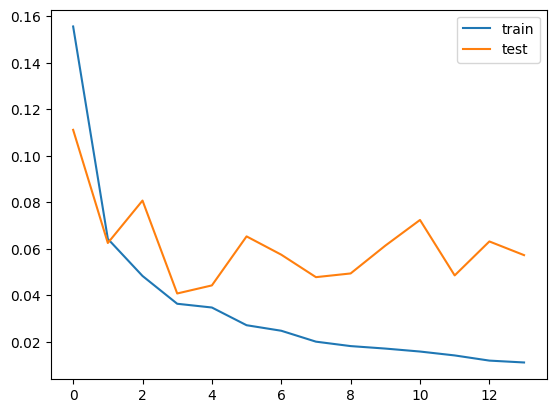

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train')
plt.plot(r.history['val_loss'], label='test')
plt.legend()

In [32]:
pp=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [33]:
pp[0]

array([4.8097236e-13, 6.2657812e-09, 4.4160346e-09, 5.1857879e-11,
       2.6279519e-09, 5.8821632e-12, 9.1107319e-16, 1.0000000e+00,
       1.6483465e-12, 1.3173255e-09], dtype=float32)

In [34]:
end=len(pp)
end

10000

In [36]:
labels=[]
for i in range(end):
  x=np.argmax(pp[i, :])
  labels.append(x)

labels


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [44]:
rnd=np.random.randint(end)
y1=labels[rnd]
y2=ytest[rnd]
print(f'real is {y2} and predicted is {y1}'.format(y2,y1))

real is 2 and predicted is 2
